In [43]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
YOUR_PATH = '../4.1.pandas/names/'  # путь до файлов


def create_path(year):
    folders = os.path.normpath(YOUR_PATH)
    return os.path.join(folders, 'yob' + str(year) + '.txt')

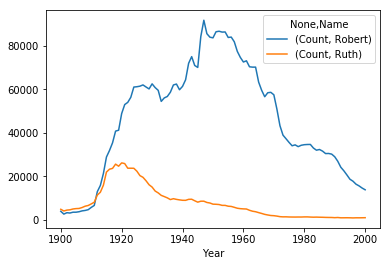

In [45]:
data_by_years = {}
for year in range(1900, 2001):
    data_by_years[year] = pd.read_csv(create_path(year), names=['Name', 'Gender', 'Count'])
names_1900_2000 = pd.concat(data_by_years, names=['Year', 'Pos'])         
names_1900_2000 = names_1900_2000.groupby([names_1900_2000.index.get_level_values(0), 'Name']).sum()
names_1900_2000.query('Name == ["Ruth", "Robert"]').unstack('Name').plot()

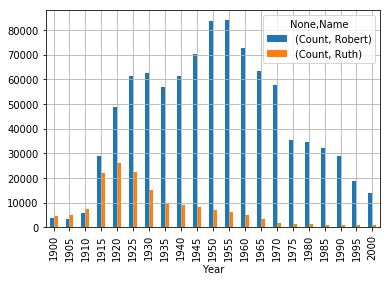

In [46]:
data_by_years = {}
for year in range(1900, 2001, 5):
    data_by_years[year] = pd.read_csv(create_path(year), names=['Name', 'Gender', 'Count'])
names_1900_2000_step_5 = pd.concat(data_by_years, names=['Year', 'Pos'])         
names_1900_2000_step_5 = names_1900_2000_step_5.groupby([names_1900_2000_step_5.index.get_level_values(0), 'Name']).sum()
names_1900_2000_step_5.query('Name == ["Ruth", "Robert"]').unstack('Name').plot.bar(grid=True)

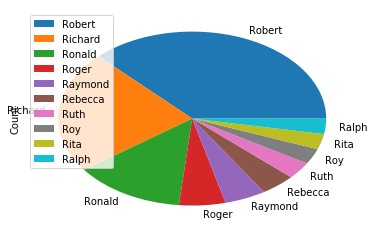

In [47]:
names_R  = pd.read_csv(create_path(1950), names=['Name', 'Gender', 'Count'])
names_R.query('Name.str[0] == "R"').groupby('Name').sum().sort_values(by='Count', ascending=False).head(10).plot.pie(y = 'Count')

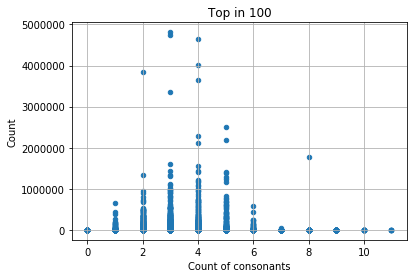

In [48]:
names_group = names_1900_2000.groupby('Name').sum().sort_values(by='Count', ascending=False).reset_index()


def count_consonants(name):
    count = 0
    for a in 'BCDFGHJKLMNPQRSTVWXZbcdfghjklmnpqrstvwxz':
        count += name.count(a)
    return count

names_group['Count of consonants'] = names_group.apply(lambda row: count_consonants(row.Name), axis=1)
names_group.plot.scatter(x='Count of consonants', y='Count', title='Top in 100', grid=True)